<a href="https://colab.research.google.com/github/dikshaaswal/Smart_Water_Consumption/blob/main/Water_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Inport Libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
train.shape

In [ ]:
#14000 entries

In [ ]:
train.head(5)

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,01/01/2002 00,1,Studio,15.31,46.61,1.06,0.97,Low,0,Swimming Pool,0.0,64.85
1,01/01/2002 08,4,NaN,21.01,66.11,2.98,0.91,Upper Middle,1,Swimming Pool,1.0,192.50
2,01/01/2002 16,2,Cottage,12.86,60.86,1.44,1.43,Middle,0,NaN,1.0,116.62
3,02/01/2002 00,2,1BHK,20.16,50.58,1.48,0.91,Middle,-1,Garden,0.0,76.96
4,02/01/2002 08,2,Cottage,16.23,52.25,1.14,1.11,Middle,0,Fountain,0.0,104.70


In [ ]:
train.isna().sum()

,0
Timestamp,0
Residents,0
Apartment_Type,426
Temperature,441
Humidity,0
Water_Price,0
Period_Consumption_Index,0
Income_Level,426
Guests,0
Amenities,5997


In [ ]:
train.Residents.value_counts()

,count
Residents,
3,4965
2,3074
5,2547
4,2525
1,609
-99,39
-11,36
-55,34
-22,32


# Fixing negative values in *Residents*

In [ ]:
# Calculate median residents per Apartment_Type (excluding negative values)
median_residents_by_type = (
    train[train["Residents"] >= 0]
    .groupby("Apartment_Type")["Residents"]
    .median()
)


In [ ]:
median_residents_by_type

,Residents
Apartment_Type,
1BHK,2.0
2BHK,4.0
3BHK,4.0
Bungalow,4.0
Cottage,3.0
Detached,4.0
Studio,1.0


In [ ]:
# Function to replace negative Residents with median of their Apartment_Type
def replace_negative_residents(row):
    if row["Residents"] < 0:
        apt_type = row["Apartment_Type"]
        if pd.notnull(apt_type) and apt_type in median_residents_by_type:
            return median_residents_by_type[apt_type]
        else:
                    # if apartment type is missing take the overall median
                    return train[train["Residents"] >= 0]["Residents"].median()
    return row["Residents"]

# Step 3: Apply the function
train["Residents"] = train.apply(replace_negative_residents, axis=1)

# Verify no negative values remain
(train["Residents"] < 0).sum()


np.int64(0)

In [ ]:
train.Residents.value_counts()

,count
Residents,
3.0,5011
2.0,3122
4.0,2686
5.0,2547
1.0,634


In [ ]:
train.Amenities.value_counts()

,count
Amenities,
Garden,2627
Swimming Pool,2086
Fountain,1648
Jacuzzi,1642


In [ ]:
train.Appliance_Usage.value_counts()

,count
Appliance_Usage,
0.0,10841
1.0,2744


In [ ]:
train[train['Residents']==-88].head(5)

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption


# Handling Missing and Noisy Values

## 1. *Apartment_type*

In [ ]:
train.Apartment_Type.value_counts()

,count
Apartment_Type,
2BHK,3157
1BHK,3019
Bungalow,1925
3BHK,1909
Cottage,1824
Studio,1186
Detached,554


In [ ]:
train.Apartment_Type.value_counts(normalize=True)

,proportion
Apartment_Type,
2BHK,0.232577
1BHK,0.222410
Bungalow,0.141815
3BHK,0.140637
Cottage,0.134375
Studio,0.087373
Detached,0.040813


In [ ]:
train.Income_Level.value_counts()

,count
Income_Level,
Middle,5323
Upper Middle,3966
Low,2276
Rich,1593
8pi3`,1
...,...
j~+x!,1
S6z.[,1
0jYUt,1


In [ ]:
# changing the value in Income_Level where it's not Middle, Upper Middle, low and Rich

train.loc[~train['Income_Level'].isin(['Middle', 'Upper Middle', 'Low', 'Rich']), 'Income_Level'] = 'Other'


In [ ]:
train.Income_Level.value_counts()

,count
Income_Level,
Middle,5323
Upper Middle,3966
Low,2276
Rich,1593
Other,842


In [ ]:
train['Amenities'] = train['Amenities'].fillna('Not Mentioned')

In [ ]:
amenities_by_type = train.groupby("Apartment_Type")["Amenities"].value_counts(normalize=True).unstack()
amenities_by_type

Amenities,Fountain,Garden,Jacuzzi,Not Mentioned,Swimming Pool
Apartment_Type,,,,,
1BHK,0.081815,0.238821,0.087115,0.514740,0.077509
2BHK,0.119417,0.179601,0.124485,0.428255,0.148242
3BHK,0.178628,0.131482,0.162913,0.299109,0.227868
Bungalow,0.158961,0.128831,0.171948,0.308052,0.232208
Cottage,0.088268,0.197917,0.088268,0.523026,0.102522
Detached,0.196751,0.088448,0.169675,0.205776,0.339350
Studio,0.044688,0.296796,0.036256,0.563238,0.059022


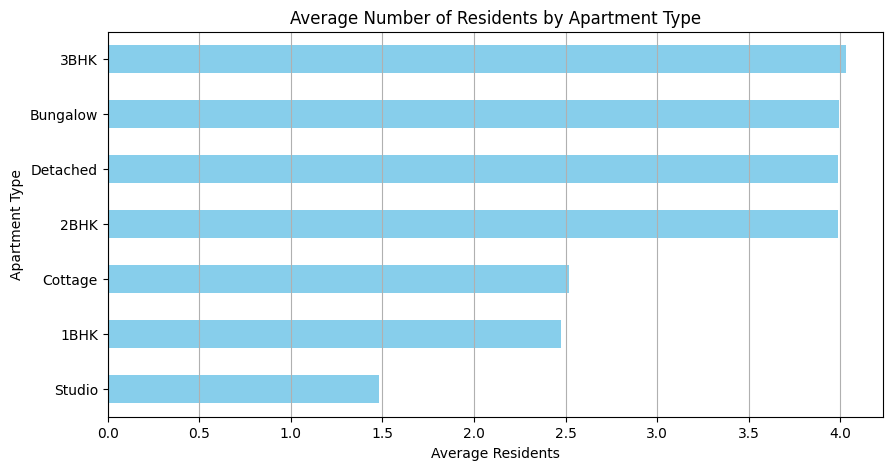

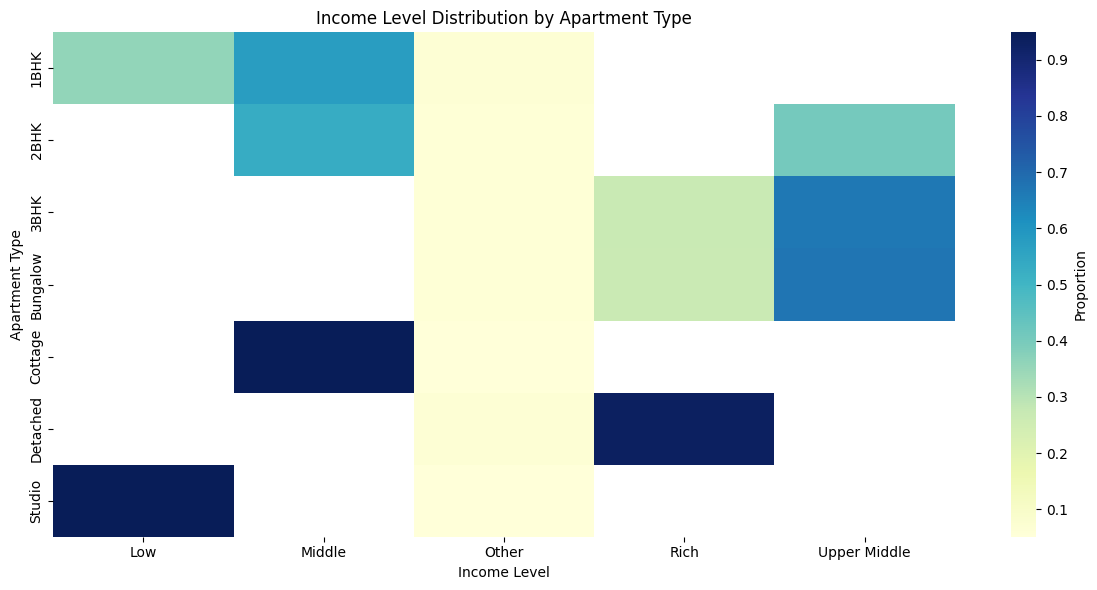

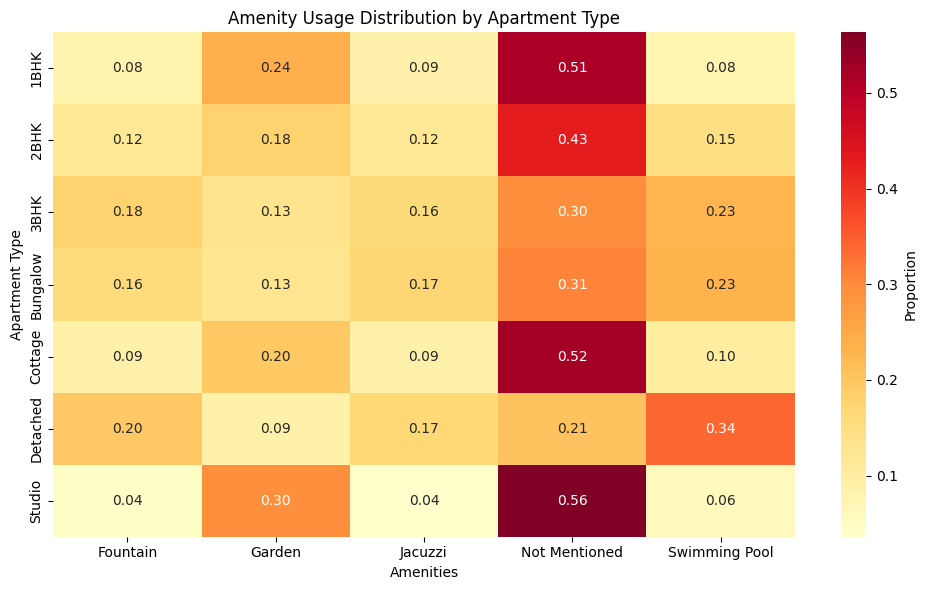

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Apartment_Type for mean number of residents
residents_by_type = train.groupby("Apartment_Type")["Residents"].mean().sort_values()

# Income Level distribution across Apartment Types (normalized)
income_by_type = train.groupby("Apartment_Type")["Income_Level"].value_counts(normalize=True).unstack()

# Amenities distribution across Apartment Types (normalized)
amenities_by_type = train.groupby("Apartment_Type")["Amenities"].value_counts(normalize=True).unstack()

# --- Plot 1: Average Residents by Apartment Type ---
plt.figure(figsize=(10, 5))
residents_by_type.plot(kind='barh', color='skyblue')
plt.title("Average Number of Residents by Apartment Type")
plt.xlabel("Average Residents")
plt.ylabel("Apartment Type")
plt.grid(axis='x')
plt.show()

# --- Plot 2: Income Level Heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(income_by_type, cmap="YlGnBu", cbar_kws={'label': 'Proportion'})
plt.title("Income Level Distribution by Apartment Type")
plt.xlabel("Income Level")
plt.ylabel("Apartment Type")
plt.tight_layout()
plt.show()

# --- Plot 3: Amenities Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(amenities_by_type, cmap="YlOrRd", annot=True, fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title("Amenity Usage Distribution by Apartment Type")
plt.xlabel("Amenities")
plt.ylabel("Apartment Type")
plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

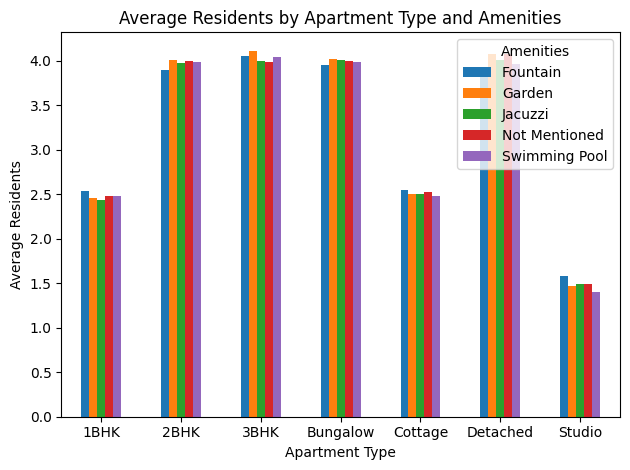

In [ ]:

import matplotlib.pyplot as plt
# --- Plot 4: Bar plot for each amenities and average residents in each apartment type ---
plt.figure(figsize=(15, 6))

# Group by Apartment_Type and Amenities for average residents
amenities_residents = train.groupby(['Apartment_Type', 'Amenities'])['Residents'].mean().unstack()

# Plot the bar chart
amenities_residents.plot(kind='bar', rot=0)
plt.title("Average Residents by Apartment Type and Amenities")
plt.xlabel("Apartment Type")
plt.ylabel("Average Residents")
plt.legend(title="Amenities")
plt.tight_layout()
plt.show()


In [ ]:
amenities_residents

Amenities,Fountain,Garden,Jacuzzi,Not Mentioned,Swimming Pool
Apartment_Type,,,,,
1BHK,2.538462,2.457698,2.441065,2.483269,2.478632
2BHK,3.901857,4.015873,3.972010,4.000740,3.982906
3BHK,4.055718,4.115538,4.000000,3.985989,4.039080
Bungalow,3.957516,4.020161,4.009063,3.994941,3.988814
Cottage,2.552795,2.504155,2.509317,2.525157,2.481283
Detached,3.853211,4.081633,4.010638,4.078947,3.968085
Studio,1.584906,1.465909,1.488372,1.489521,1.400000


In [ ]:
apartment_mode_map = (
    train[train["Apartment_Type"].notnull()]
    .groupby(["Residents", "Income_Level"])["Apartment_Type"]
    .agg(lambda x: x.mode().iloc[0])  # Get most frequent Apartment_Type
    .reset_index()
    .rename(columns={"Apartment_Type": "Most_Likely_Apartment"})
)

In [ ]:
apartment_mode_map

,Residents,Income_Level,Most_Likely_Apartment
0,1.0,Low,Studio
1,1.0,Other,Studio
2,2.0,Low,Studio
3,2.0,Middle,1BHK
4,2.0,Other,1BHK
5,3.0,Low,1BHK
6,3.0,Middle,Cottage
7,3.0,Other,1BHK
8,3.0,Rich,Detached
9,3.0,Upper Middle,2BHK


In [ ]:
# Step 2: Merge with original dataframe to get predictions for missing values
train = train.merge(
    apartment_mode_map,
    how="left",
    on=["Residents", "Income_Level"]
)

# Step 3: Fill missing Apartment_Type with predicted value
train["Apartment_Type"] = train["Apartment_Type"].fillna(train["Most_Likely_Apartment"])

# Step 4: Drop helper column
train.drop(columns=["Most_Likely_Apartment"], inplace=True)

# Confirm missing values are handled
train["Apartment_Type"].isnull().sum()

np.int64(0)

## *Temperature*

In [ ]:
train.Temperature.min()

10.0

In [ ]:
train.Temperature.max()

35.0

In [ ]:
train.Humidity.unique()

array(['46.61', '66.11', '60.86', ..., '67.75', '81.81', '64.48'],
      dtype=object)

In [ ]:
train.Humidity.min()

'!_Jb%'

In [ ]:
train.Humidity.value_counts()

,count
Humidity,
51.69,13
53.07,12
49.32,12
55.05,11
56.31,11
...,...
30.98,1
30.02,1
72.73,1


In [ ]:
train.Humidity.max()

'~rf\\M'

In [ ]:
train["Humidity"] = pd.to_numeric(train["Humidity"], errors='coerce')

In [ ]:
train.Humidity.isna().sum()

np.int64(397)

In [ ]:
train[train.Humidity>90]

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
2173,26/12/2003 08,4.0,Detached,22.21,77700.0,2.81,0.95,Rich,0,Swimming Pool,1.0,246.77


In [ ]:

# Replace Humidity values greater than 90 with NaN
train.loc[train.Humidity > 90, 'Humidity'] = float('NaN')


In [ ]:
train[train.Humidity>90]

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption


In [ ]:
train.Humidity.isna().sum()

np.int64(398)

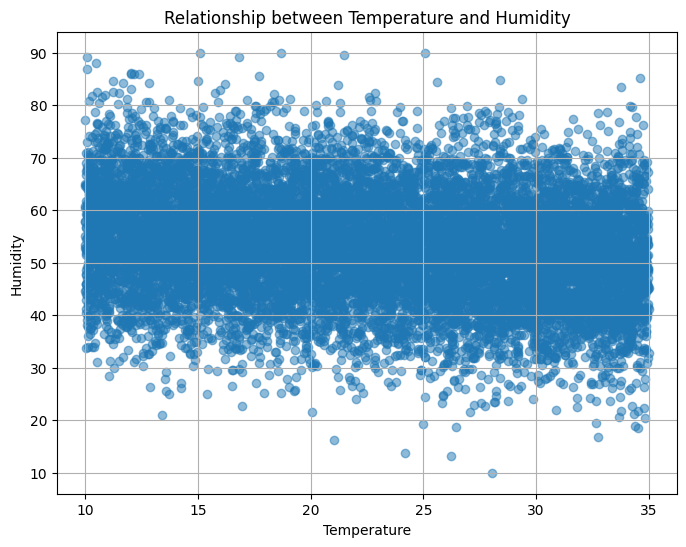

Correlation between Temperature and Humidity: -0.2025601756951581


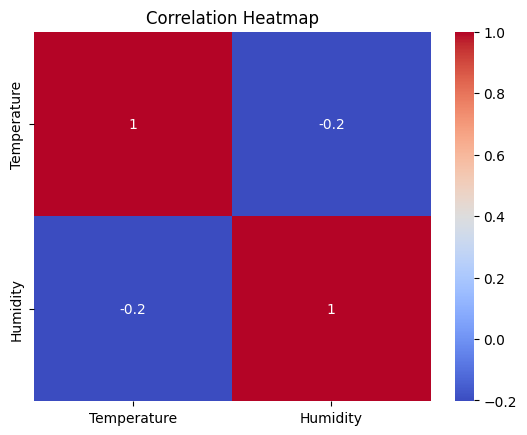

In [ ]:
# relation between temperature and humidity

import matplotlib.pyplot as plt
# Create a scatter plot to visualize the relationship between temperature and humidity
plt.figure(figsize=(8, 6))
plt.scatter(train['Temperature'], train['Humidity'], alpha=0.5)
plt.title('Relationship between Temperature and Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

# Calculate the correlation between temperature and humidity
correlation = train['Temperature'].corr(train['Humidity'])
print(f"Correlation between Temperature and Humidity: {correlation}")

# You can also use seaborn to create a heatmap for correlation
sns.heatmap(train[['Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
## timestamp based grouping

In [ ]:
train["Timestamp"].isna().sum()


np.int64(0)

In [ ]:
train["Timestamp"].unique()

array(['01/01/2002 00', '01/01/2002 08', '01/01/2002 16', ...,
       '10/10/2014 16', '11/10/2014 00', '11/10/2014 08'], dtype=object)

In [ ]:
train.iloc[50]["Timestamp"]

'17/01/2002 16'

In [ ]:
# Step 1: Check type and missing values
print("Data Type:", train["Timestamp"].dtype)
print("Missing values:", train["Timestamp"].isnull().sum())

Data Type: object
Missing values: 0


In [ ]:
invalid_timestamps = []
from dateutil.parser import parse

for ts in train["Timestamp"]:
    try:
        parse(ts)
    except Exception as e:
        invalid_timestamps.append(ts)

print("Invalid timestamps found:", len(invalid_timestamps))
print("Examples:", invalid_timestamps[:5])

Invalid timestamps found: 0
Examples: []


In [ ]:
train["Parsed_Timestamp"] = pd.to_datetime(train["Timestamp"], format='%d/%m/%Y %H', dayfirst=True)

In [ ]:
train["Parsed_Timestamp"].isnull().sum()

np.int64(0)

In [ ]:
import plotly.express as px


# Sort and remove missing temperatures
plot_df = train[["Parsed_Timestamp", "Temperature"]].dropna().sort_values("Parsed_Timestamp")

# Interactive line plot
fig = px.line(
    plot_df,
    x="Parsed_Timestamp",
    y="Temperature",
    title="Interactive Temperature Over Time",
    labels={"Parsed_Timestamp": "Timestamp", "Temperature": "Temperature (°C)"}
)

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()


In [ ]:
train.Temperature.isna().sum()

np.int64(441)

In [ ]:
# Step 1: Ensure Parsed_Timestamp is datetime and sorted
train = train.sort_values("Parsed_Timestamp")
train = train.set_index("Parsed_Timestamp")

# Step 2: Interpolate temperature using time-based method
train["Temperature"] = train["Temperature"].interpolate(method="time")

# Step 3: Reset index back if needed
train = train.reset_index()

# Step 4: Check if any missing values remain
print("Remaining missing temperatures:", train["Temperature"].isnull().sum())

Remaining missing temperatures: 0


In [ ]:
train.isna().sum()

,0
Parsed_Timestamp,0
Timestamp,0
Residents,0
Apartment_Type,0
Temperature,0
Humidity,398
Water_Price,0
Period_Consumption_Index,0
Income_Level,0
Guests,0


## *Humidity*

In [ ]:
train.Humidity

,Humidity
0,46.61
1,66.11
2,60.86
3,50.58
4,52.25
...,...
13995,61.50
13996,52.58
13997,46.93
13998,64.48


In [ ]:
import plotly.express as px


# Sort and remove missing Humidity
plot_df = train[["Parsed_Timestamp", "Humidity"]].dropna().sort_values("Parsed_Timestamp")

# Interactive line plot
fig = px.line(
    plot_df,
    x="Parsed_Timestamp",
    y="Humidity",
    title="Interactive Humidity Over Time",
    labels={"Parsed_Timestamp": "Timestamp", "Humidity": "Humidity"}
)

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()


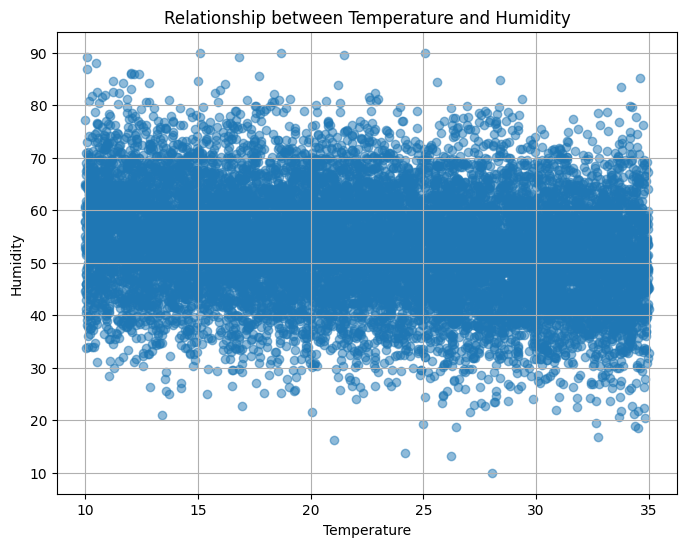

Correlation between Temperature and Humidity: -0.19824763058850317


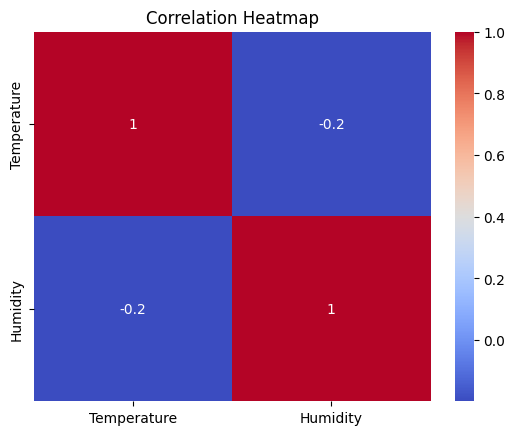

In [ ]:
# relation between temperature and humidity

import matplotlib.pyplot as plt
# Create a scatter plot to visualize the relationship between temperature and humidity
plt.figure(figsize=(8, 6))
plt.scatter(train['Temperature'], train['Humidity'], alpha=0.5)
plt.title('Relationship between Temperature and Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

# Calculate the correlation between temperature and humidity
correlation = train['Temperature'].corr(train['Humidity'])
print(f"Correlation between Temperature and Humidity: {correlation}")

# You can also use seaborn to create a heatmap for correlation
sns.heatmap(train[['Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Assuming Parsed_Timestamp is still datetime and index
train = train.sort_values("Parsed_Timestamp")
train = train.set_index("Parsed_Timestamp")

train["Humidity"] = train["Humidity"].interpolate(method="time")

train = train.reset_index()
print("Remaining missing temperatures:", train["Temperature"].isnull().sum())

Remaining missing temperatures: 0


In [ ]:
train.isna().sum()

,0
Parsed_Timestamp,0
Timestamp,0
Residents,0
Apartment_Type,0
Temperature,0
Humidity,0
Water_Price,0
Period_Consumption_Index,0
Income_Level,0
Guests,0


## *Water Price*

In [ ]:
train.Water_Price.max()

3.0

In [ ]:
train.Water_Price.min()

-99.0

In [ ]:
len(train[train.Water_Price <0])

272

In [ ]:
train[train.Water_Price <0].Water_Price.value_counts()

,count
Water_Price,
-44.0,34
-22.0,33
-88.0,33
-66.0,33
-77.0,31
-33.0,28
-11.0,27
-55.0,27
-99.0,26


In [ ]:

# Filter for valid (positive) water prices
valid_prices_df = train[(train["Water_Price"] > 0) & (train["Parsed_Timestamp"].notnull())]

# Sort by timestamp
valid_prices_df = valid_prices_df.sort_values("Parsed_Timestamp")

# Create interactive line plot
fig = px.line(
    valid_prices_df,
    x="Parsed_Timestamp",
    y="Water_Price",
    title="Water Price Over Time (Only Positive Prices)",
    labels={"Parsed_Timestamp": "Timestamp", "Water_Price": "Water Price"},
)

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()


In [ ]:
train.loc[train["Water_Price"] < 0, "Water_Price"] = np.nan

# Sort by timestamp and set index for interpolation
train = train.sort_values("Parsed_Timestamp").set_index("Parsed_Timestamp")

# Interpolate missing prices based on time
train["Water_Price"] = train["Water_Price"].interpolate(method="time")

# Reset index back
train = train.reset_index()

In [ ]:
print("Remaining missing temperatures:", train["Temperature"].isnull().sum())

Remaining missing temperatures: 0


In [ ]:
train.Period_Consumption_Index.min()

-0.130782308337841

In [ ]:
train.Period_Consumption_Index.max()

2.352311270032941

## *Guests*

In [ ]:
train.Guests.min()

-2

In [ ]:
train.Guests.max()

3

In [ ]:
train.Guests.value_counts()

,count
Guests,
0,9658
1,4123
-1,151
2,65
-2,2
3,1


In [ ]:
# co-relation between apartment type and guests only where guests value is positive

# Filter out rows where Guests is negative
train_positive_guests = train[train['Guests'] >= 0]

# Calculate the correlation between Apartment_Type and Guests
correlation_apartment_guests = train_positive_guests.groupby('Apartment_Type')['Guests'].corr(train_positive_guests['Guests'])

correlation_apartment_guests


,Guests
Apartment_Type,
1BHK,1.0
2BHK,1.0
3BHK,1.0
Bungalow,1.0
Cottage,1.0
Detached,1.0
Studio,1.0


In [ ]:
train[train.Apartment_Type == '1BHK'].Guests.value_counts()

,count
Guests,
0,2164
1,893
-1,34
2,18
3,1
-2,1


In [ ]:
train[train.Apartment_Type == '2BHK'].Guests.value_counts()

,count
Guests,
0,2260
1,937
-1,41
2,12


In [ ]:
train[train.Apartment_Type == 'Detached'].Guests.value_counts()

,count
Guests,
0,395
1,180
-1,5


In [ ]:
train[train.Guests <0].Apartment_Type.value_counts(normalize=True)

,proportion
Apartment_Type,
2BHK,0.267974
1BHK,0.228758
Bungalow,0.163399
3BHK,0.137255
Studio,0.084967
Cottage,0.084967
Detached,0.032680


In [ ]:
train.Apartment_Type.value_counts(normalize=True)

,proportion
Apartment_Type,
2BHK,0.232143
1BHK,0.222214
3BHK,0.141357
Bungalow,0.138714
Cottage,0.135929
Studio,0.088214
Detached,0.041429


In [ ]:
train.loc[train["Guests"] < 0, "Guests"] = 0

In [ ]:
train.Guests.value_counts()

,count
Guests,
0,9811
1,4123
2,65
3,1


## *Amenities*

In [ ]:
train.Amenities.value_counts()

,count
Amenities,
Not Mentioned,5997
Garden,2627
Swimming Pool,2086
Fountain,1648
Jacuzzi,1642


In [ ]:
train.isna().sum()

,0
Parsed_Timestamp,0
Timestamp,0
Residents,0
Apartment_Type,0
Temperature,0
Humidity,0
Water_Price,0
Period_Consumption_Index,0
Income_Level,0
Guests,0


## *Appliance_Usage*

In [ ]:
train.Appliance_Usage.value_counts()

,count
Appliance_Usage,
0.0,10841
1.0,2744


In [ ]:
train.Appliance_Usage.isna().sum()

np.int64(415)

Correlation between Appliance_Usage and Period_Consumption_Index: -0.026938427290544343


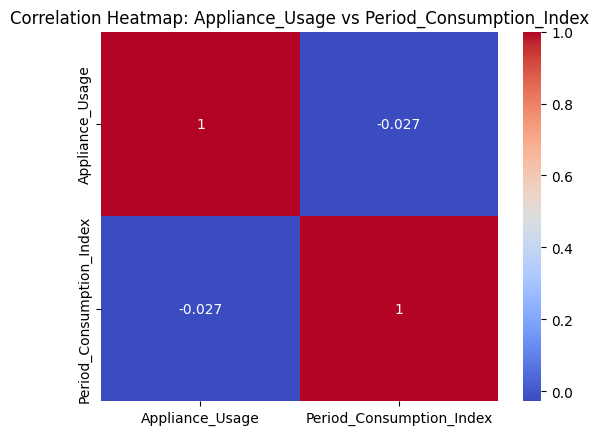

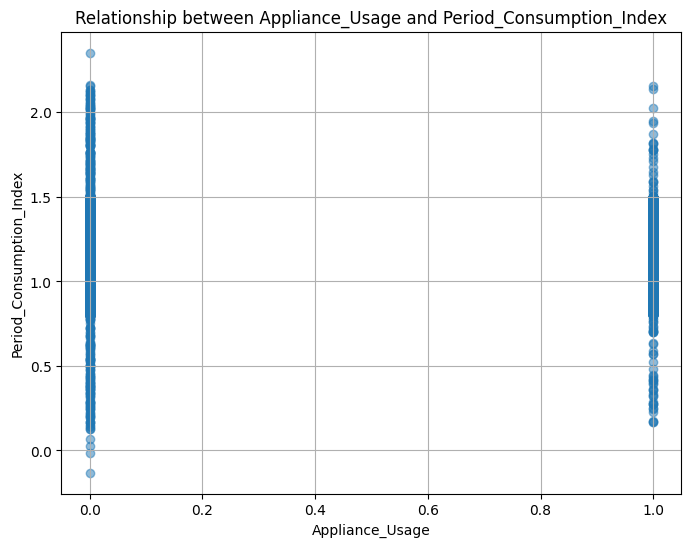

In [ ]:
# correlation between appliance usage and period consumption index

import matplotlib.pyplot as plt
# Calculate the correlation between Appliance_Usage and Period_Consumption_Index
correlation = train['Appliance_Usage'].corr(train['Period_Consumption_Index'])

print(f"Correlation between Appliance_Usage and Period_Consumption_Index: {correlation}")

# You can also use seaborn to create a heatmap for correlation
sns.heatmap(train[['Appliance_Usage', 'Period_Consumption_Index']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Appliance_Usage vs Period_Consumption_Index')
plt.show()

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(train['Appliance_Usage'], train['Period_Consumption_Index'], alpha=0.5)
plt.title('Relationship between Appliance_Usage and Period_Consumption_Index')
plt.xlabel('Appliance_Usage')
plt.ylabel('Period_Consumption_Index')
plt.grid(True)
plt.show()


Correlation between Appliance_Usage and Water_Consumption: 0.12694686841376965


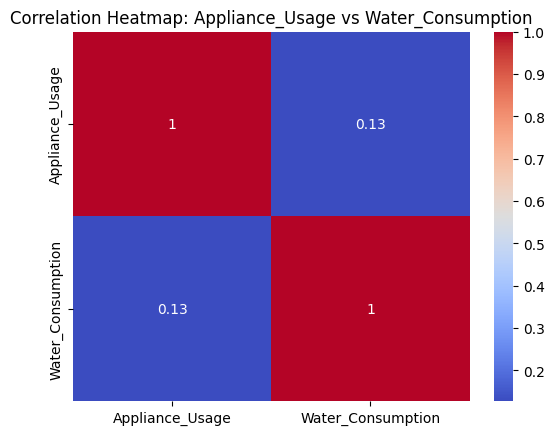

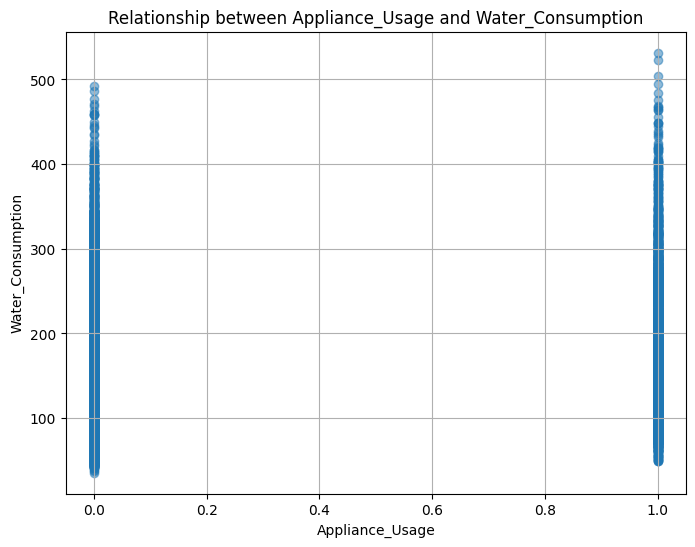

In [ ]:
# correlation between appliance usage and water consumption

import matplotlib.pyplot as plt
# Calculate the correlation between Appliance_Usage and Water_Consumption
correlation = train['Appliance_Usage'].corr(train['Water_Consumption'])

print(f"Correlation between Appliance_Usage and Water_Consumption: {correlation}")

# You can also use seaborn to create a heatmap for correlation
sns.heatmap(train[['Appliance_Usage', 'Water_Consumption']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Appliance_Usage vs Water_Consumption')
plt.show()

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(train['Appliance_Usage'], train['Water_Consumption'], alpha=0.5)
plt.title('Relationship between Appliance_Usage and Water_Consumption')
plt.xlabel('Appliance_Usage')
plt.ylabel('Water_Consumption')
plt.grid(True)
plt.show()


Correlation between Appliance_Usage and Water_Price: -0.007717644396971302


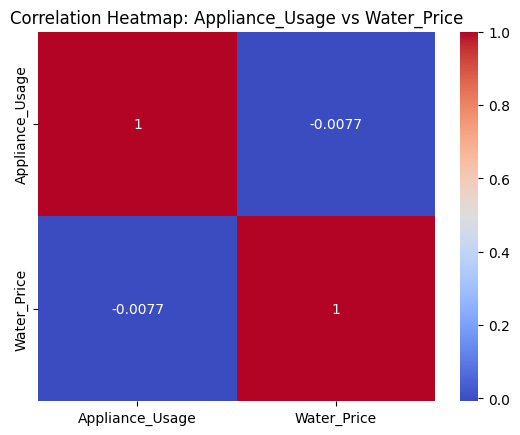

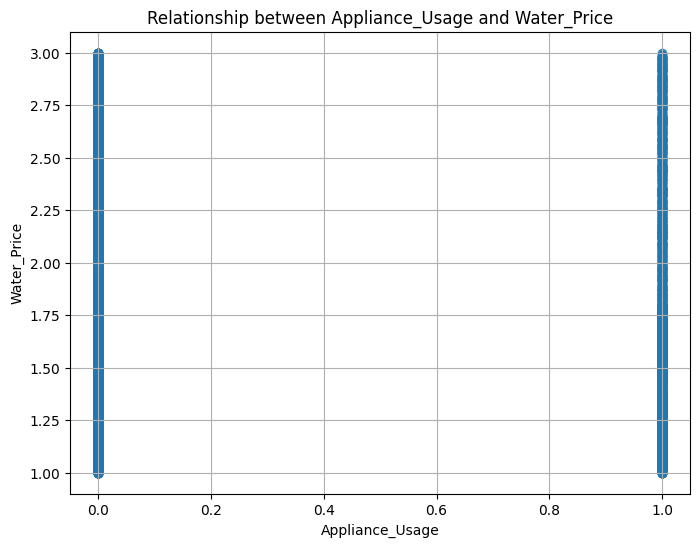

In [ ]:
# correlation between water price and appliance usage

import matplotlib.pyplot as plt
# correlation between appliance usage and water price

# Calculate the correlation between Appliance_Usage and Water_Price
correlation = train['Appliance_Usage'].corr(train['Water_Price'])

print(f"Correlation between Appliance_Usage and Water_Price: {correlation}")

# You can also use seaborn to create a heatmap for correlation
sns.heatmap(train[['Appliance_Usage', 'Water_Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Appliance_Usage vs Water_Price')
plt.show()

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(train['Appliance_Usage'], train['Water_Price'], alpha=0.5)
plt.title('Relationship between Appliance_Usage and Water_Price')
plt.xlabel('Appliance_Usage')
plt.ylabel('Water_Price')
plt.grid(True)
plt.show()


In [ ]:
mode_usage = train["Appliance_Usage"].mode().iloc[0]


In [ ]:
mode_usage

np.float64(0.0)

In [ ]:
train["Appliance_Usage"] = train["Appliance_Usage"].fillna(mode_usage)

# Relationship between different fields and water consumption

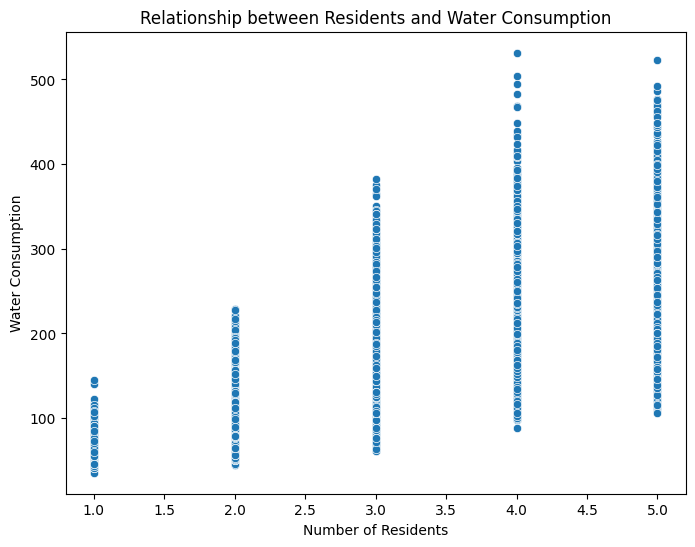

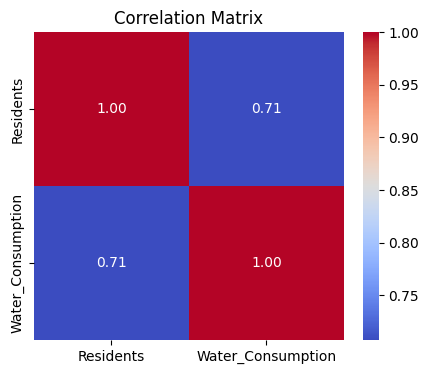

In [ ]:

import matplotlib.pyplot as plt
# --- Plot 5: Scatter plot for Residents vs Water_Consumption ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Residents', y='Water_Consumption', data=train)
plt.title('Relationship between Residents and Water Consumption')
plt.xlabel('Number of Residents')
plt.ylabel('Water Consumption')
plt.show()

# --- Plot 6: Correlation matrix heatmap ---
correlation_matrix = train[['Residents', 'Water_Consumption']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


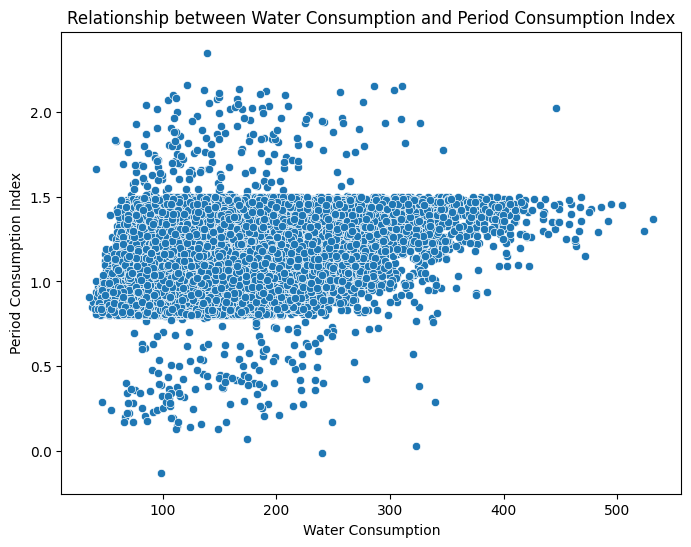

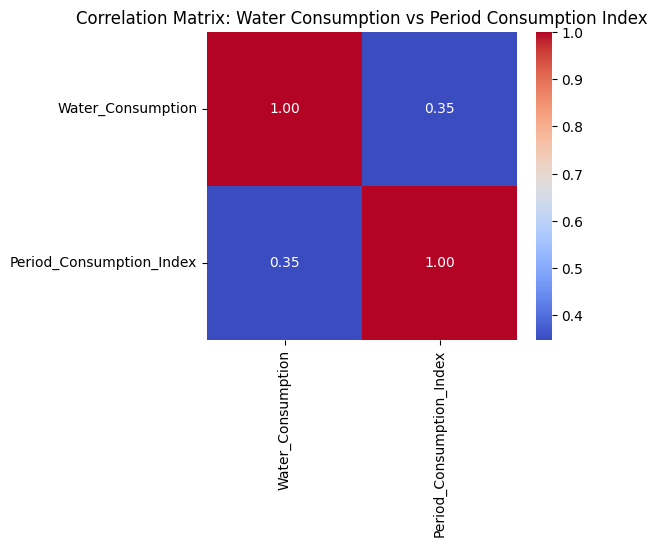

In [ ]:
# prompt: I want to see the relation between water_consumption and Period_Consumption_Index

import matplotlib.pyplot as plt
# --- Plot 7: Scatter plot for Water_Consumption vs Period_Consumption_Index ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Water_Consumption', y='Period_Consumption_Index', data=train)
plt.title('Relationship between Water Consumption and Period Consumption Index')
plt.xlabel('Water Consumption')
plt.ylabel('Period Consumption Index')
plt.show()

# --- Plot 8: Correlation matrix heatmap including Water_Consumption and Period_Consumption_Index ---
correlation_matrix = train[['Water_Consumption', 'Period_Consumption_Index']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Water Consumption vs Period Consumption Index')
plt.show()


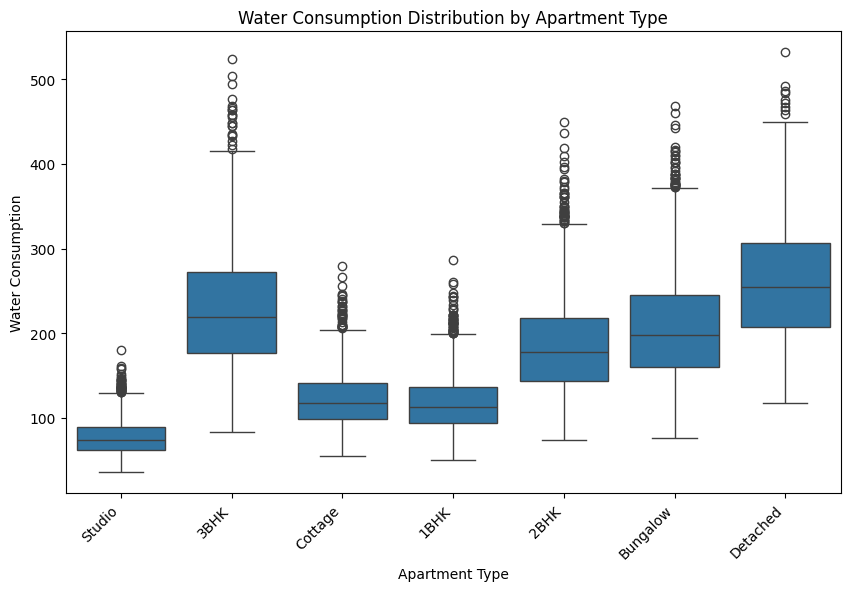

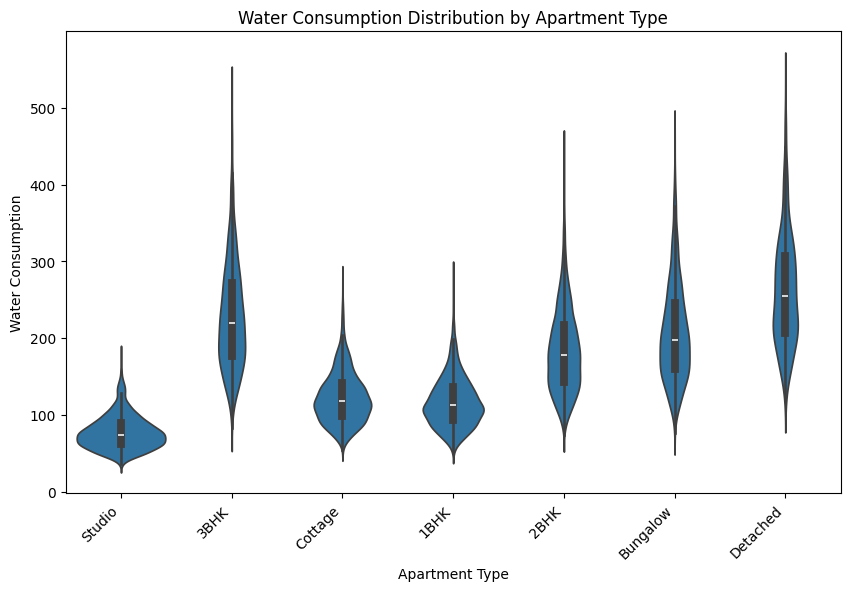

In [ ]:

import matplotlib.pyplot as plt
# --- Plot 9: Box plot for Water_Consumption by Apartment_Type ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Apartment_Type', y='Water_Consumption', data=train)
plt.title('Water Consumption Distribution by Apartment Type')
plt.xlabel('Apartment Type')
plt.ylabel('Water Consumption')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# --- Plot 10: Violin plot for Water_Consumption by Apartment_Type ---
plt.figure(figsize=(10, 6))
sns.violinplot(x='Apartment_Type', y='Water_Consumption', data=train)
plt.title('Water Consumption Distribution by Apartment Type')
plt.xlabel('Apartment Type')
plt.ylabel('Water Consumption')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Correlation between Appliance_Usage and Water_Consumption: 0.12482290911071181


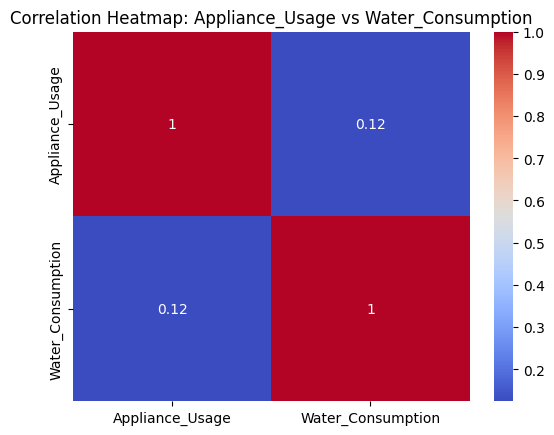

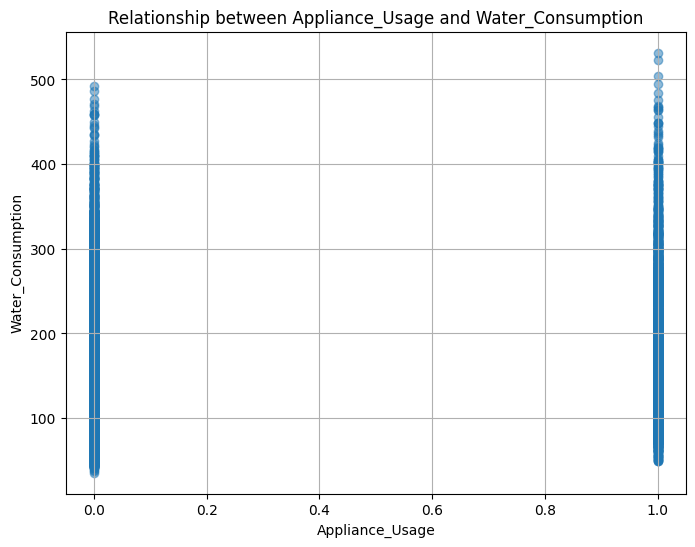

In [ ]:
# correlation between appliance usage and water consumption

import matplotlib.pyplot as plt
# Calculate the correlation between Appliance_Usage and Water_Consumption
correlation = train['Appliance_Usage'].corr(train['Water_Consumption'])

print(f"Correlation between Appliance_Usage and Water_Consumption: {correlation}")

# You can also use seaborn to create a heatmap for correlation
sns.heatmap(train[['Appliance_Usage', 'Water_Consumption']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Appliance_Usage vs Water_Consumption')
plt.show()

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(train['Appliance_Usage'], train['Water_Consumption'], alpha=0.5)
plt.title('Relationship between Appliance_Usage and Water_Consumption')
plt.xlabel('Appliance_Usage')
plt.ylabel('Water_Consumption')
plt.grid(True)
plt.show()


<ipython-input-201-c8109f99748b>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




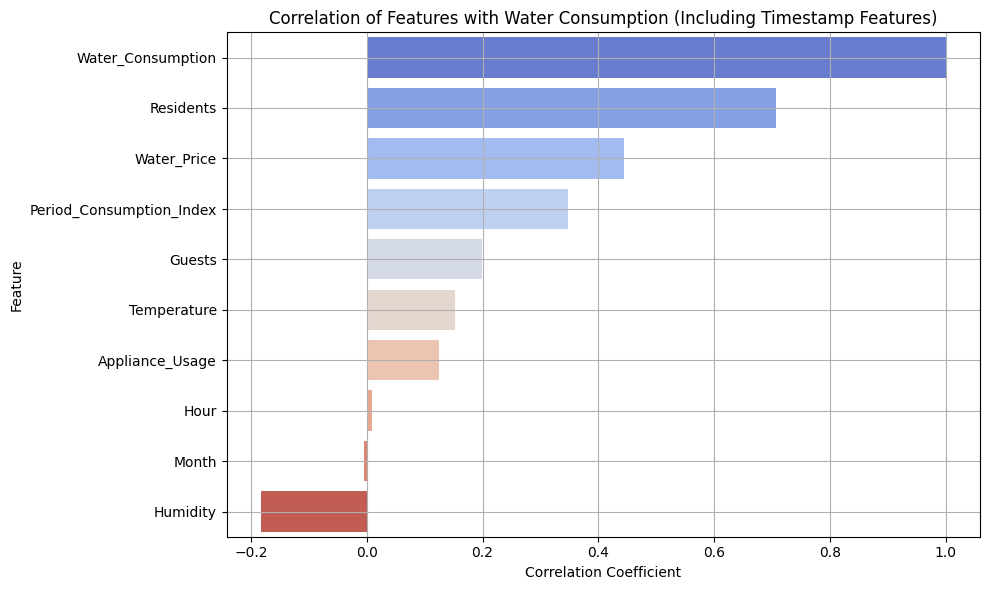

,Water_Consumption
Water_Consumption,1.000000
Residents,0.707439
Water_Price,0.444438
Period_Consumption_Index,0.348025
Guests,0.199490
Temperature,0.152323
Appliance_Usage,0.124823
Hour,0.009822
Month,-0.003939
Humidity,-0.182720


In [ ]:
# Extract Month and Hour from the Parsed_Timestamp
train["Month"] = train["Parsed_Timestamp"].dt.month
train["Hour"] = train["Parsed_Timestamp"].dt.hour

# Compute correlation with Water_Consumption again after ensuring Month and Hour are present
correlation_with_target = train.corr(numeric_only=True)["Water_Consumption"].sort_values(ascending=False)

# Plot correlation with target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")
plt.title("Correlation of Features with Water Consumption (Including Timestamp Features)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_with_target


# Model Development

In [ ]:
train.columns

Index(['Parsed_Timestamp', 'Timestamp', 'Residents', 'Apartment_Type',
       'Temperature', 'Humidity', 'Water_Price', 'Period_Consumption_Index',
       'Income_Level', 'Guests', 'Amenities', 'Appliance_Usage',
       'Water_Consumption', 'Month', 'Hour'],
      dtype='object')

## RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 1: Define features and target
target = "Water_Consumption"
features = [
    "Residents", "Apartment_Type", "Temperature", "Humidity", "Water_Price",
    "Period_Consumption_Index", "Income_Level", "Guests", "Amenities",
    "Appliance_Usage"
]

X = train[features]
y = train[target]

# Step 2: Preprocess categorical and numeric features
categorical_features = ["Apartment_Type", "Income_Level", "Amenities"]
numerical_features = list(set(features) - set(categorical_features))

# Column transformer to apply different preprocessing to numeric and categorical columns
preprocessor = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="median"), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Step 3: Create a pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42, n_estimators=100))
])

# Step 4: Split data and train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

# Step 5: Evaluate on validation set
y_pred = model_pipeline.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val,y_pred))

score = max(0, 100 - rmse)

rmse, score


(np.float64(16.969599777809606), np.float64(83.0304002221904))

## XGBoostRegressor

In [ ]:
train.index

RangeIndex(start=0, stop=14000, step=1)

In [ ]:
# XGBoost model + pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Define features and target
target = "Water_Consumption"
# features = [
#     "Residents", "Apartment_Type", "Temperature", "Humidity", "Water_Price",
#     "Period_Consumption_Index", "Income_Level", "Guests", "Amenities",
#     "Appliance_Usage"
# ]

features = [
    "Residents", "Water_Price",'Income_Level',
    "Period_Consumption_Index", 'Apartment_Type'
]


X = train[features]
y = train[target]
print(X.shape)
print(y.shape)
print(X.isna().sum())

# Step 2: Preprocess categorical and numeric features
# categorical_features = ["Apartment_Type", "Income_Level", "Amenities"]
categorical_features = ["Apartment_Type", "Income_Level"]

numerical_features = list(set(features) - set(categorical_features))

# Column transformer to apply different preprocessing to numeric and categorical columns
preprocessor = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="median"), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])





# Step 2: Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define pipeline with placeholder model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(random_state=42))
])

# Step 4: Hyperparameter search space (use prefix 'model__' for pipeline)
param_distributions = {
    "model__n_estimators": [100, 200, 300, 350, 400],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [5, 6, 8, 10, 12],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0]
}

# Step 5: RandomizedSearchCV only on training data
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Step 6: Evaluate best model on validation set
best_model = random_search.best_estimator_

y_val_pred = best_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_score = max(0, 100 - val_rmse)

print("Validation RMSE:", val_rmse)
print("Validation Score:", val_score)


(14000, 5)
(14000,)
Residents                   0
Water_Price                 0
Income_Level                0
Period_Consumption_Index    0
Apartment_Type              0
dtype: int64
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Validation RMSE: 33.484242349633995
Validation Score: 66.515757650366


In [ ]:
train_filter = y_train > 150
X_train_filtered = X_train[train_filter]
y_train_filtered = y_train[train_filter]

val_filter = y_val > 150
X_val_filtered = X_val[val_filter]
y_val_filtered = y_val[val_filter]

# Step 3: Define pipeline with placeholder model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(random_state=42))
])

# Step 4: Hyperparameter search space (use prefix 'model__' for pipeline)
param_distributions = {
    "model__n_estimators": [100, 200, 300, 350, 400],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [5, 6, 8, 10, 12],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0]
}

# Step 5: RandomizedSearchCV only on training data
random_search_filtered = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_filtered.fit(X_train_filtered, y_train_filtered)

# Step 6: Evaluate best model on validation set
best_model_filtered = random_search_filtered.best_estimator_

y_val_filtered_pred = best_model_filtered.predict(X_val_filtered)
val_rmse = np.sqrt(mean_squared_error(y_val_filtered, y_val_filtered_pred))
val_score = max(0, 100 - val_rmse)

print("Validation RMSE:", val_rmse)
print("Validation Score:", val_score)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Validation RMSE: 12.709266321730423
Validation Score: 87.29073367826958


In [ ]:
val_filter = y_val <= 150
X_val_filtered = X_val[val_filter]
y_val_filtered = y_val[val_filter]
y_val_pred_filtered = best_model.predict(X_val_filtered)
val_rmse = np.sqrt(mean_squared_error(y_val_filtered, y_val_pred_filtered))
val_score = max(0, 100 - val_rmse)

print("Validation RMSE:", val_rmse)
print("Validation Score:", val_score)


Validation RMSE: 7.174582594655907
Validation Score: 92.8254174053441


In [ ]:
val_filter = y_val > 150
X_val_filtered = X_val[val_filter]
y_val_filtered = y_val[val_filter]
y_val_pred_filtered = best_model.predict(X_val_filtered)
val_rmse = np.sqrt(mean_squared_error(y_val_filtered, y_val_pred_filtered))
val_score = max(0, 100 - val_rmse)

print("Validation RMSE:", val_rmse)
print("Validation Score:", val_score)

Validation RMSE: 13.184174532764278
Validation Score: 86.81582546723573


In [ ]:
random_search.best_params_

{'model__subsample': 1.0,
 'model__n_estimators': 350,
 'model__max_depth': 5,
 'model__learning_rate': 0.05,
 'model__colsample_bytree': 0.6}

In [ ]:
train[target]<=200

,Water_Consumption
0,True
1,True
2,True
3,True
4,True
...,...
13995,True
13996,True
13997,True
13998,False


In [ ]:

# Step 1: Define features and target
target = "Water_Consumption"
features = [
    "Residents", "Apartment_Type", "Temperature", "Humidity", "Water_Price",
    "Period_Consumption_Index", "Income_Level", "Guests", "Amenities",
    "Appliance_Usage"
]

filtered = train[target]>150
train_filtered = train[filtered]

X_filtered = train_filtered[features]
y_filtered = train_filtered[target]

# Step 2: Split data into train and validation sets
X_train_filtered, X_val_filtered, y_train_filtered, y_val_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
print(train_filtered.shape)
print(X_train_filtered.shape)



# Step 3: Define pipeline with placeholder model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(random_state=42))
])

# Step 4: Hyperparameter search space (use prefix 'model__' for pipeline)
param_distributions = {
    "model__n_estimators": [100, 200, 300, 350, 400],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [5, 6, 8, 10, 12],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0]
}

# Step 5: RandomizedSearchCV only on training data
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_filtered, y_train_filtered)

# Step 6: Evaluate best model on validation set
best_model_filtered = random_search.best_estimator_

y_val_pred = best_model_filtered.predict(X_val_filtered)
val_rmse = np.sqrt(mean_squared_error(y_val_filtered, y_val_pred))
val_score = max(0, 100 - val_rmse)

print("Validation RMSE:", val_rmse)
print("Validation Score:", val_score)




(7022, 15)
(5617, 10)
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Validation RMSE: 15.274343539176336
Validation Score: 84.72565646082367


In [ ]:
len(y_val)

2800

In [ ]:
y_val_pred = best_model.predict(X_val)
y_val_pred_filtered = best_model_filtered.predict(X_val)
# Step 4: Combine predictions based on rule
final_preds = np.where(y_val_pred > 150, y_val_pred_filtered, y_val_pred)

# Step 5: Evaluate hybrid model
hybrid_rmse = np.sqrt(mean_squared_error(y_val, final_preds))
hybrid_score = max(0, 100 - hybrid_rmse)
hybrid_rmse, hybrid_score

(np.float64(8.614466602539343), np.float64(91.38553339746066))

In [ ]:
random_search.best_params_

{'model__subsample': 1.0,
 'model__n_estimators': 350,
 'model__max_depth': 5,
 'model__learning_rate': 0.05,
 'model__colsample_bytree': 0.6}

In [ ]:
len(y_val)

2800

In [ ]:
X_val

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage
2900,2.0,1BHK,22.24,58.58,1.52,1.41,Low,0,Not Mentioned,0.0
3143,2.0,Cottage,13.00,66.51,1.62,1.40,Middle,0,Garden,0.0
8231,3.0,1BHK,10.41,66.32,1.41,0.92,Middle,1,Not Mentioned,0.0
3855,1.0,Studio,26.81,49.08,1.07,1.27,Low,1,Garden,0.0
8045,3.0,Cottage,16.22,84.13,1.55,1.00,Middle,0,Garden,1.0
...,...,...,...,...,...,...,...,...,...,...
5130,5.0,3BHK,23.83,48.53,2.61,1.07,Upper Middle,0,Not Mentioned,0.0
9657,5.0,2BHK,29.75,54.07,1.74,0.87,Upper Middle,0,Swimming Pool,0.0
11668,3.0,Cottage,27.28,52.49,1.45,0.82,Middle,1,Fountain,0.0
12065,3.0,3BHK,30.98,60.90,1.91,1.32,Upper Middle,0,Not Mentioned,1.0


### Prediction vs Actual Water Consumption

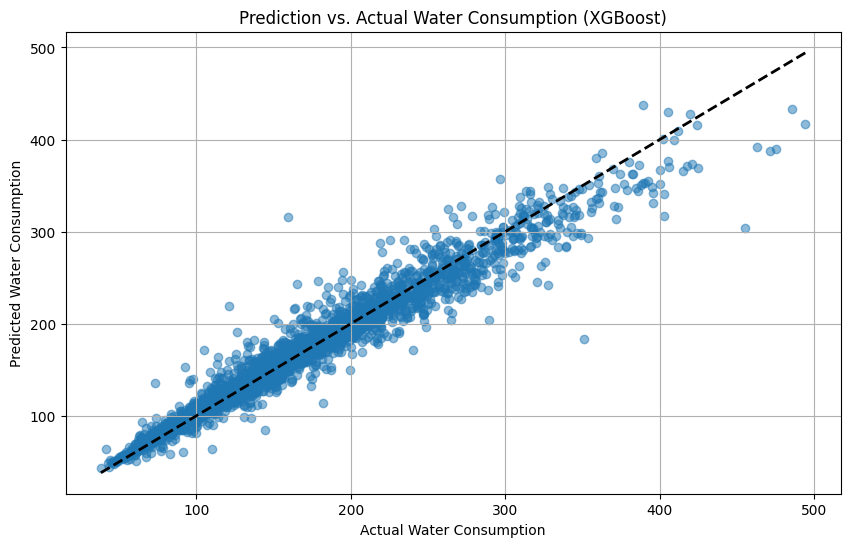

In [ ]:
# plot Prediction vs Actual Water Consumption

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Water Consumption')
plt.ylabel('Predicted Water Consumption')
plt.title('Prediction vs. Actual Water Consumption (XGBoost)')
plt.grid(True)
plt.show()


In [ ]:
actual_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
actual_train.iloc[626]

,626
Timestamp,28/07/2002 16
Residents,3
Apartment_Type,3BHK
Temperature,21.03
Humidity,68.18
Water_Price,1.77
Period_Consumption_Index,1.43
Income_Level,Rich
Guests,0
Amenities,Swimming Pool


In [ ]:
X_val['Original_index'] = X_val.index

In [ ]:
# the points which contributed the most for the high rmse

# Assuming 'y_val' and 'y_pred' are your actual and predicted water consumption values
# and 'X_val' contains your validation data.

import numpy as np

# Calculate the absolute errors
errors = np.abs(y_val - y_pred)

# Find the indices of the points with the largest errors
top_error_indices = np.argpartition(errors, -10)[-20:]  # Get indices of 10 largest errors
print(top_error_indices)
# Print the points with the largest errors and their corresponding features
for index in top_error_indices:
  print(f"Point Index: {index}")
  print(f"Actual Consumption: {y_val.iloc[index]}")
  print(f"Predicted Consumption: {y_pred[index]}")
  # print(f"Error: {errors[index]}")

  print(f"Features: {X_val.iloc[index].to_dict()}")
  index_value = X_val.iloc[index]['Original_index']

  print(f'Actual Features: {actual_train.loc[index_value].to_dict()}')
  print("-" * 20)


[ 626 1572 2513 1900  482 1865 1165  717 1225 1575 1350  841 2079 1504
  346 1667  512 1784  436 1261]
Point Index: 626
Actual Consumption: 126.61
Predicted Consumption: 191.1528
Features: {'Residents': 4.0, 'Apartment_Type': 'Bungalow', 'Temperature': 32.77, 'Humidity': 55.96, 'Water_Price': 1.54, 'Period_Consumption_Index': 0.8, 'Income_Level': 'Upper Middle', 'Guests': 0, 'Amenities': 'Garden', 'Appliance_Usage': 0.0, 'Original_index': 8142}
Actual Features: {'Timestamp': '07/06/2009 00', 'Residents': 4, 'Apartment_Type': 'Bungalow', 'Temperature': 32.77, 'Humidity': '55.96', 'Water_Price': 1.54, 'Period_Consumption_Index': 0.8, 'Income_Level': 'Upper Middle', 'Guests': 0, 'Amenities': 'Garden', 'Appliance_Usage': 0.0, 'Water_Consumption': 126.61}
--------------------
Point Index: 1572
Actual Consumption: 225.44
Predicted Consumption: 290.40330000000006
Features: {'Residents': 4.0, 'Apartment_Type': 'Detached', 'Temperature': 26.52, 'Humidity': 38.88, 'Water_Price': 2.5, 'Period_Con

# Test Dataset

## Test Data Preparation

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
test.isna().sum()


,0
Timestamp,0
Residents,0
Apartment_Type,166
Temperature,150
Humidity,0
Water_Price,0
Period_Consumption_Index,0
Income_Level,165
Guests,0
Amenities,2513


In [ ]:
# check for negative values in residents

In [ ]:
test.Residents.min()

-99

In [ ]:
test.Residents.max()

5

In [ ]:

# Step 3: Apply the function
test["Residents"] = test.apply(replace_negative_residents, axis=1)

# Verify no negative values remain
(test["Residents"] < 0).sum()

np.int64(0)

In [ ]:
test['Amenities'] = test['Amenities'].fillna('Not Mentioned')
test.loc[~test['Income_Level'].isin(['Middle', 'Upper Middle', 'Low', 'Rich']), 'Income_Level'] = 'Other'


In [ ]:
apartment_mode_map

,Residents,Income_Level,Most_Likely_Apartment
0,1.0,Low,Studio
1,1.0,Other,Studio
2,2.0,Low,Studio
3,2.0,Middle,1BHK
4,2.0,Other,1BHK
5,3.0,Low,1BHK
6,3.0,Middle,Cottage
7,3.0,Other,1BHK
8,3.0,Rich,Detached
9,3.0,Upper Middle,2BHK


In [ ]:
# Step 2: Merge with original dataframe to get predictions for missing values
test = test.merge(
    apartment_mode_map,
    how="left",
    on=["Residents", "Income_Level"]
)

# Step 3: Fill missing Apartment_Type with predicted value
test["Apartment_Type"] = test["Apartment_Type"].fillna(test["Most_Likely_Apartment"])

# Step 4: Drop helper column
test.drop(columns=["Most_Likely_Apartment"], inplace=True)

# Confirm missing values are handled
test["Apartment_Type"].isnull().sum()

np.int64(0)

In [ ]:
test.isna().sum()


,0
Timestamp,0
Residents,0
Apartment_Type,0
Temperature,150
Humidity,0
Water_Price,0
Period_Consumption_Index,0
Income_Level,0
Guests,0
Amenities,0


In [ ]:
test["Parsed_Timestamp"] = pd.to_datetime(test["Timestamp"], format='%d/%m/%Y %H', dayfirst=True)

In [ ]:
# Step 2: Sort and set timestamp as index
test = test.sort_values("Parsed_Timestamp")
test = test.set_index("Parsed_Timestamp")

# Step 3: Interpolate missing Temperature based on time
test["Temperature"] = test["Temperature"].interpolate(method="time")

# Step 4: Reset index if needed
test = test.reset_index()

In [ ]:
# Ensure Humidity is numeric before interpolation
test["Humidity"] = pd.to_numeric(test["Humidity"], errors="coerce")

# Sort and set index by timestamp
test = test.sort_values("Parsed_Timestamp").set_index("Parsed_Timestamp")

# Interpolate using time
test["Humidity"] = test["Humidity"].interpolate(method="time")

# Reset index back
test = test.reset_index()

# Confirm no missing values
print("Remaining missing Humidity:", test["Humidity"].isnull().sum())


Remaining missing Humidity: 0


In [ ]:
test.Apartment_Type.unique()

array(['Bungalow', 'Cottage', '1BHK', '3BHK', '2BHK', 'Detached',
       'Studio'], dtype=object)

In [ ]:
test.loc[test["Water_Price"] < 0, "Water_Price"] = np.nan

# Sort by timestamp and set index for interpolation
test = test.sort_values("Parsed_Timestamp").set_index("Parsed_Timestamp")

# Interpolate missing prices based on time
test["Water_Price"] = test["Water_Price"].interpolate(method="time")

# Reset index back
test = test.reset_index()
print("Remaining missing Water_Price:", test["Water_Price"].isnull().sum())


Remaining missing Water_Price: 0


In [ ]:
test.loc[test["Guests"] < 0, "Guests"] = 0

In [ ]:
test["Appliance_Usage"] = test["Appliance_Usage"].fillna(mode_usage)

In [ ]:
test.isna().sum()


,0
Parsed_Timestamp,0
Timestamp,0
Residents,0
Apartment_Type,0
Temperature,0
Humidity,0
Water_Price,0
Period_Consumption_Index,0
Income_Level,0
Guests,0


## RandomForest Regressor

In [ ]:
# Step 2: Make predictions using the trained pipeline
X_test = test[features]
predictions = model_pipeline.predict(X_test)

# Step 3: Create submission dataframe using original test Timestamp
submission_df = pd.DataFrame({
    "Timestamp": test["Timestamp"],
    "Water_Consumption": predictions
})

# Step 4: Save to CSV
submission_df.to_csv("submission.csv", index=False)

In [ ]:
submission_df

## XGBoostRegressor

In [ ]:
# Assume test_df is cleaned and preprocessed (just like train_df)
X_test = test[features]

# Predict
predictions = best_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    "Timestamp": test["Timestamp"],
    "Water_Consumption": predictions
})

submission.to_csv("submission.csv", index=False)

In [ ]:
# Assume test_df is cleaned and preprocessed (just like train_df)
X_test = test[features]
predictions = best_model.predict(X_test)
predictions_filtered = best_model_filtered.predict(X_test)
# Step 4: Combine predictions based on rule
final_preds = np.where(predictions_filtered > 150, predictions_filtered, predictions)

In [ ]:
len(final_preds)

6000

In [ ]:
# Create submission file
submission = pd.DataFrame({
    "Timestamp": test["Timestamp"],
    "Water_Consumption": final_preds
})

submission.to_csv("submission.csv", index=False)

In [ ]:
len(submission)

6000